# Hotel booking demand Data analysis
#### Hotel booking demand dataset avalable at: https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand 

**Assumptions:**
* All prices are in EUR
* Adults and children as paying guests only, not babies.

In [53]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  

In [54]:
df = pd.read_csv('hotel_bookings.csv')
df.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [55]:
df.shape

(119390, 32)

Dataset contains 119390 rows and 32 columns

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

## Data Analysis

**which countries does the hotel receive guests the most?**

In [57]:
top_countries = df[df['is_canceled'] == 0]['country'].value_counts().head(10)

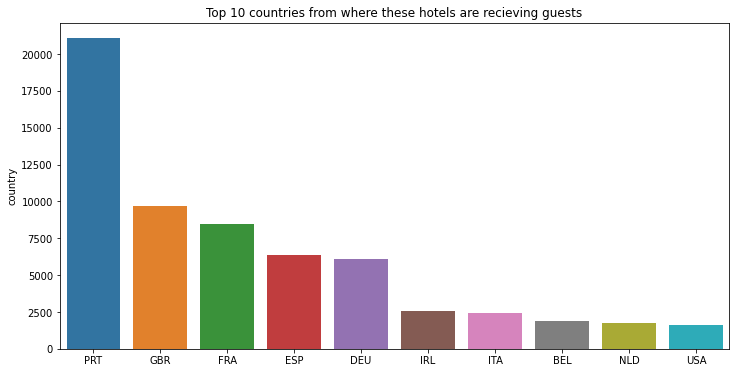

In [58]:
plt.figure(figsize=(12,6))
plt.title('Top 10 countries from where these hotels are recieving guests')
sns.barplot(x=top_countries.index, y=top_countries)
plt.show()

**Answer:** we can see that highest number of guests are from Portugal and the USA comes in the 10th place

**How much do guests pay for a room per night in average?**

In [59]:
resort_hotel = df.loc[(df["hotel"] == "Resort Hotel") & (df["is_canceled"] == 0)]
city_hotel = df.loc[(df["hotel"] == "City Hotel") & (df["is_canceled"] == 0)]

In [60]:
resort_hotel["adr_pp"] = resort_hotel["adr"] / (resort_hotel["adults"] + resort_hotel["children"])
resort_hotel_filtered = resort_hotel.replace([np.inf, -np.inf], 0) # replacing infinite values with 0.

<ipython-input-60-1c32bbc0ad15>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resort_hotel["adr_pp"] = resort_hotel["adr"] / (resort_hotel["adults"] + resort_hotel["children"])


In [61]:
city_hotel["adr_pp"] = city_hotel["adr"] / (city_hotel["adults"] + city_hotel["children"])
city_hotel_filtered = city_hotel.replace([np.inf, -np.inf], 0) # replacing infinite values with 0.

<ipython-input-61-0f8ddef9a99b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_hotel["adr_pp"] = city_hotel["adr"] / (city_hotel["adults"] + city_hotel["children"])


In [62]:
print(f"Resort hotel: {resort_hotel_filtered['adr_pp'].mean()}")
print(f"City hotel: {city_hotel_filtered['adr_pp'].mean()}")

Resort hotel: 47.487224033231925
City hotel: 59.23442698168307


**Answer:** From all non-cnceled bookings, across all room types and meals, the average prices are:

Resort hotel: *47.48 € per night and person.*

City hotel: *59.23 € per night and person.*

In [63]:
# Adding normalize price per night (adr) to the main dataframe
df["adr_pp"] = df["adr"] / (df["adults"] + df["children"])

**How does the price per night vary over the year?**

In [64]:
monthly_prices = df[["hotel", "arrival_date_month", "adr_pp"]].sort_values("arrival_date_month")

In [65]:
# order by month
ordered_months = ["January", "February", "March", "April", "May", "June", "July", "August","September", "October", "November", "December"]
monthly_prices["arrival_date_month"] = pd.Categorical(monthly_prices["arrival_date_month"], categories=ordered_months, ordered=True)

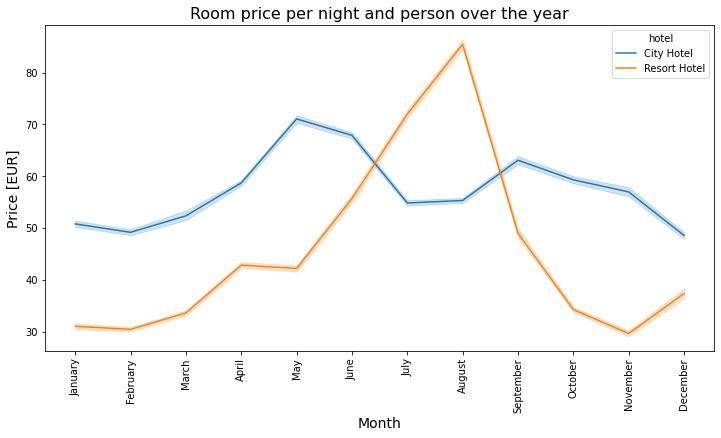

In [66]:
plt.figure(figsize=(12, 6))
sns.lineplot(x = "arrival_date_month", y="adr_pp", hue="hotel", data=monthly_prices)
plt.title("Room price per night and person over the year", fontsize=16)
plt.xlabel("Month", fontsize=14)
plt.xticks(rotation=90)
plt.ylabel("Price [EUR]", fontsize=14)
plt.show()

**Answer:** We can clearly see that the Resort hotel prices are higher during the mouth of august and the prices of the city hotel varies and is the highest during the month of may

**How many guests are there who have repeatedly canceled the bookings?**

In [67]:
canceled_repeatedly = df[(df["is_canceled"] == 1) & (df["is_repeated_guest"] == 1)]

In [68]:
canceled_repeatedly['hotel'].value_counts()

City Hotel      441
Resort Hotel    111
Name: hotel, dtype: int64

**Answer:** 441 cancellation from the City Hotel and 111 cancellation from the Resort Hotel

**What is the monthly customers each hotel is receiving?**

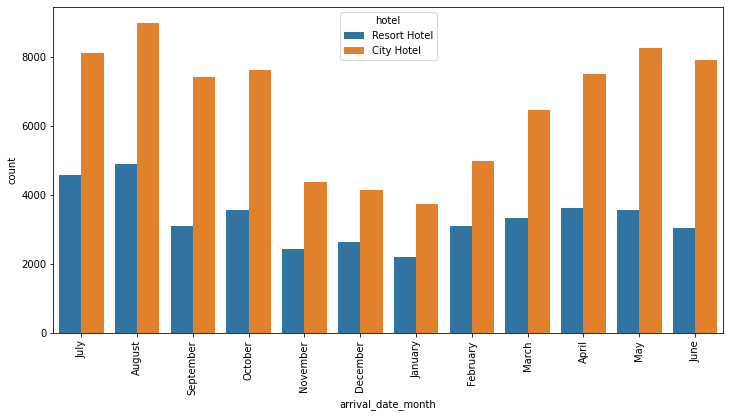

In [69]:
plt.figure(figsize=(12, 6))
plt.xticks(rotation=90)
sns.countplot(x = "arrival_date_month", hue = 'hotel', data = df)
plt.show()

**Answer:** we can see that the City Hotel receives more guests than the Resort hotel

**Which are the most busy month?**

In [70]:
resort_guests_monthly = resort_hotel.groupby("arrival_date_month")["hotel"].count()
city_guests_monthly = city_hotel.groupby("arrival_date_month")["hotel"].count()

In [71]:
resort_guest_data = pd.DataFrame({"month": list(resort_guests_monthly.index),"hotel": "Resort hotel", "guests": list(resort_guests_monthly.values)})
city_guest_data = pd.DataFrame({"month": list(city_guests_monthly.index),"hotel": "City hotel", "guests": list(city_guests_monthly.values)})

In [72]:
full_guest_data = pd.concat([resort_guest_data,city_guest_data], ignore_index=True)
full_guest_data.head()

,month,hotel,guests
0,April,Resort hotel,2550
1,August,Resort hotel,3257
2,December,Resort hotel,2017
3,February,Resort hotel,2308
4,January,Resort hotel,1868


In [73]:
# order by month
ordered_months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
full_guest_data["month"] = pd.Categorical(full_guest_data["month"], categories=ordered_months, ordered=True)

In [74]:
# This dataset contains July and August date from 3 years, the other month from 2 years. so lets normalize that
full_guest_data.loc[(full_guest_data["month"] == "July") | (full_guest_data["month"] == "August"),"guests"] /= 3
full_guest_data.loc[~((full_guest_data["month"] == "July") | (full_guest_data["month"] == "August")), "guests"] /= 2

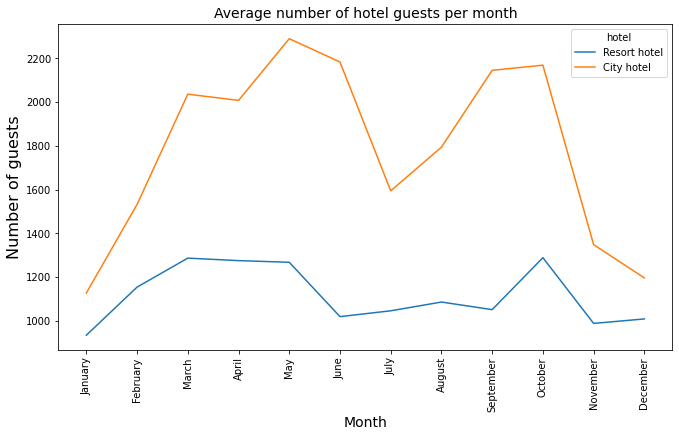

In [75]:
plt.figure(figsize=(11, 6))
sns.lineplot(x = "month", y="guests", hue="hotel", data=full_guest_data)
plt.title("Average number of hotel guests per month", fontsize=14)
plt.xlabel("Month", fontsize=14)
plt.xticks(rotation=90)
plt.ylabel("Number of guests", fontsize=16)
plt.show()

**Answer:** we can see that City Hotel seems to increase the guests in the month of April and September and the more Resort Hotel has more guests by the month of march and october.

**How many bookings were canceled?**

In [76]:
# absolute cancelations
total_cancelations = df["is_canceled"].sum()
resort_hotel_cancelations = df.loc[df["hotel"] == "Resort Hotel"]["is_canceled"].sum()
city_hotel_cancelations = df.loc[df["hotel"] == "City Hotel"]["is_canceled"].sum()

In [77]:
# as percent
total_cancelations_percent = total_cancelations / df.shape[0] * 100
resort_hotel_cancelations_percent = resort_hotel_cancelations / df.loc[df["hotel"] == "Resort Hotel"].shape[0] * 100
city_hotel_cancelations_percent = city_hotel_cancelations / df.loc[df["hotel"] == "City Hotel"].shape[0] * 100

In [78]:
print(f"Total bookings canceled: {total_cancelations:,} ({total_cancelations_percent:.0f} %)")
print(f"Resort hotel bookings canceled: {resort_hotel_cancelations:,} ({resort_hotel_cancelations_percent:.0f} %)")
print(f"City hotel bookings canceled: {resort_hotel_cancelations:,} ({city_hotel_cancelations_percent:.0f} %)")

Total bookings canceled: 44,224 (37 %)
Resort hotel bookings canceled: 11,122 (28 %)
City hotel bookings canceled: 11,122 (42 %)
